# Modeling - Football Transfer Data Project

In this notebook, we will tackle our training and test sets created in the [previous notebook](http://localhost:8888/notebooks/Springboard/Springboard/Capstone%202/Capstone%202%20-%20Preprocessing%20and%20Training.ipynb) and try to run through a few models in an effort to create a best model for predicting market value.

We saved the split of data between training data (found in scaled_training.csv) and prediction data (found in prediciton.csv). Our training sets of data will be found in the scaled_training data set, which we will read in now, along with importing the necessary libraries.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import preprocessing

df = pd.read_csv('scaled_training.csv')
df.head()

train_df = pd.read_csv("training.csv")

As we can see, our dataframe for testing has already been scaled in the previous notebook. We will now recreate our training and test data split, as we did before.

In [96]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns='market_value')
y = train_df['market_value']
y = preprocessing.scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Selection

For this notebook, we will be creating and evaluating 4 models in an effort to find the best one for predicting market value for players in European Football. We will explore the following:

* Random Forest
* Gradient Boosting
* Support Vector Machines
* K Means Neighbors
* Stochastic Gradient Descent

#### Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, criterion='mae', random_state=1234)

rf.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', n_estimators=10, random_state=1234)

In [98]:
from sklearn import tree, metrics
y_pred_rf = pd.Series(rf.predict(X_test))
rf.score(X_test, y_test)

0.7372643881055185

In [99]:
print(r2_score(y_pred_rf, y_test))

0.6956361146006846


#### Gradient Boosting Machine

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=1234)

gb.fit(X_train, y_train)

gb.score(X_test, y_test)

0.7517475799517064

In [101]:
y_pred_gb = gb.predict(X_test)

print(r2_score(y_pred_gb, y_test))

0.6844610810349945


#### K Means Neighbors

In [114]:
from sklearn.neighbors import KNeighborsRegressor

test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


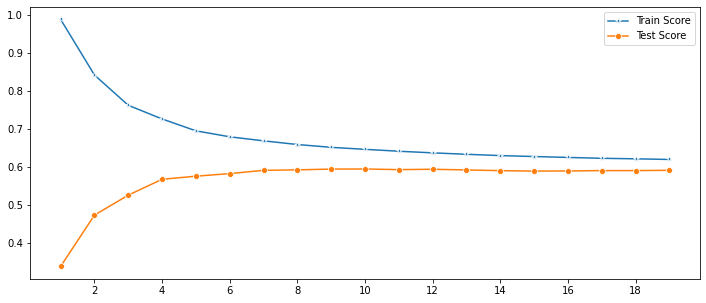

In [118]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')
plt.locator_params(nbins=10)

In [123]:
best_knn = KNeighborsRegressor(5)

best_knn.fit(X_train, y_train)

best_knn.score(X_test, y_test)

0.574935018607607

In [124]:
y_pred_knn = best_knn.predict(X_test)
print(r2_score(y_pred_knn, y_test))

0.3945291348891785


#### Stochastic Gradient Descent Regressor

In [140]:
from sklearn.linear_model import SGDRegressor
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
sgd = SGDRegressor(loss='huber')

sgd.fit(X_train, y_train)

sgd.score(X_test, y_test)

-5037227250200210.0

In [141]:
y_pred_sgd = reg.predict(X_test)

print(r2_score(y_pred_sgd, y_test))

0.16549926696693507
